<a href="https://colab.research.google.com/github/e-done/math-1009/blob/main/shortestpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configure System

In [1]:
!pip install osmnx
!pip install algorithmx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00


# Load Modules

In [1]:
import networkx as nx
import osmnx as ox
import algorithmx
import string
import itertools

# Generate Graph

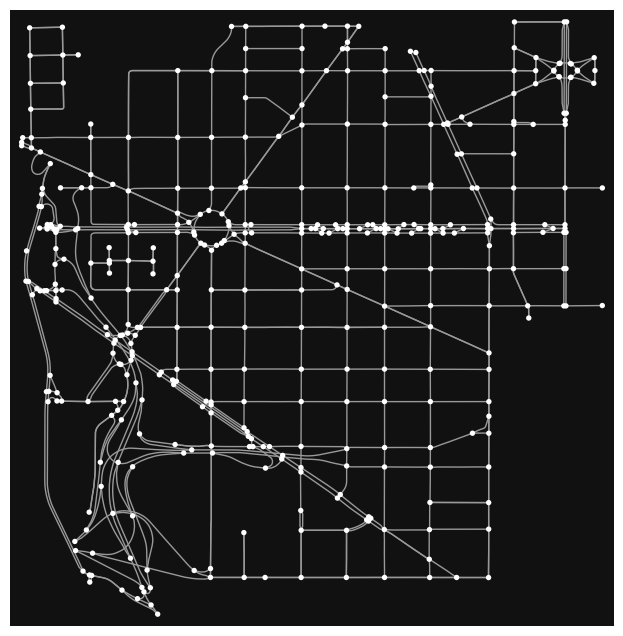

In [2]:
#G0 = ox.graph_from_point((38.8996368285404, -77.04658675552588), dist=750, network_type='walk') # right click on Google Maps to display coordinates (units for distance are meters)
#G0 = ox.graph_from_place('Washington, DC') # this is slow because large graph
G0 = ox.graph_from_address('805 21st St NW, Washington, DC', network_type='drive') # defaults to within 1 km of address
ox.plot_graph(G0)

# impute edge (driving) speeds and calculate edge traversal times
G0 = ox.add_edge_speeds(G0)
G0 = ox.add_edge_travel_times(G0)

# convert MultiDiGraph to DiGraph
G = ox.utils_graph.get_digraph(G0, weight="travel_time")

# dictionary to map nodes to A, B, C, ..., Z, AA, AB, AC, ...
def iter_all_upper():
  for size in itertools.count(1):
    for s in itertools.product(string.ascii_uppercase, repeat=size):
      yield "".join(s)
nodedict = {}
i=0
for s in iter_all_upper() :
  e = list(G.nodes)[i]
  nodedict[e] = s
  i+=1
  if i==len(G.nodes) :
    lastNode = s
    break
G = nx.relabel_nodes(G, nodedict)

# dictionary to map edges to a, b, c, ..., z, aa, ab, ac, ...
def iter_all_lower():
  for size in itertools.count(1):
    for s in itertools.product(string.ascii_lowercase, repeat=size):
      yield "".join(s)
edgedict = {}
i=0
for s in iter_all_lower() :
  e = list(G.edges)[i]
  edgedict[e] = s
  i+=1
  if i==len(G.edges) :
    break

# canvas
canvas = algorithmx.jupyter_canvas()
canvas.size((800, 800))

# nodes
canvas.nodes(G.nodes).add().color('rgb(168, 153, 104)')
canvas.nodes(G.nodes).label().color('black')

# edges
init_edges = canvas.edges(G.edges).add().directed(True).color('rgb(0, 59, 92)')
init_edges.label().add().color('black').text(lambda e: G.edges[e]['travel_time'])

# Display Graph

Graphical

In [3]:
from google.colab import output
output.enable_custom_widget_manager()
canvas # command-mousewheel to zoom

JupyterWidget(events=['{"attrs": {"size": [800, 800]}}', '{"attrs": {"nodes": {"A": {}, "B": {}, "C": {}, "D":…

Tabular

In [4]:
print(len(G.nodes),'Vertices ( A ...',lastNode,')')
print('\n')
print(len(G.edges),'Edges')
print('label = (from vertex, to vertex) : weight')
for e in G.edges :
  print(edgedict[e],' = ',e,':',G.edges[e]['travel_time'])

418 Vertices ( A ... PB )


872 Edges
label = (from vertex, to vertex) : weight
a  =  ('A', 'B') : 4.2
b  =  ('A', 'AE') : 16.7
c  =  ('B', 'A') : 4.2
d  =  ('B', 'FD') : 17.7
e  =  ('C', 'JL') : 5.4
f  =  ('C', 'LX') : 10.7
g  =  ('D', 'LE') : 3.0
h  =  ('D', 'LO') : 2.3
i  =  ('D', 'ET') : 8.5
j  =  ('E', 'CU') : 10.2
k  =  ('E', 'FS') : 5.1
l  =  ('F', 'OD') : 0.7
m  =  ('F', 'GM') : 10.3
n  =  ('G', 'L') : 2.2
o  =  ('G', 'NL') : 3.3
p  =  ('H', 'MB') : 6.3
q  =  ('I', 'MH') : 2.7
r  =  ('J', 'BR') : 20.0
s  =  ('J', 'CE') : 5.4
t  =  ('K', 'CR') : 3.8
u  =  ('K', 'NZ') : 2.6
v  =  ('L', 'KB') : 2.0
w  =  ('M', 'GU') : 11.9
x  =  ('N', 'O') : 2.3
y  =  ('N', 'FQ') : 11.5
z  =  ('N', 'CY') : 3.4
aa  =  ('O', 'N') : 2.3
ab  =  ('O', 'P') : 4.7
ac  =  ('O', 'BH') : 12.8
ad  =  ('P', 'NO') : 2.8
ae  =  ('Q', 'GI') : 4.8
af  =  ('Q', 'MW') : 2.4
ag  =  ('Q', 'CS') : 32.8
ah  =  ('R', 'EJ') : 6.5
ai  =  ('R', 'NC') : 1.0
aj  =  ('S', 'T') : 14.0
ak  =  ('S', 'AH') : 13.5
al  =  ('S', 'AI

# Shortest Path

Calculation

In [5]:
# define origin and desination locations # right click in Google Maps to get coordinates
origin_point = (38.89967022727533, -77.04655456901799)
destination_point = (38.90365291378248, -77.04172659282628)

# get the nearest nodes to the locations 
origin_node = ox.nearest_nodes(G, origin_point[1], origin_point[0]) 
destination_node = ox.nearest_nodes(G, destination_point[1], destination_point[0])

# compute
route = nx.shortest_path(G, origin_node, destination_node)

Display

['W', 'CH', 'CG', 'EP', 'CN', 'DG', 'JM', 'FF', 'JN', 'FJ']


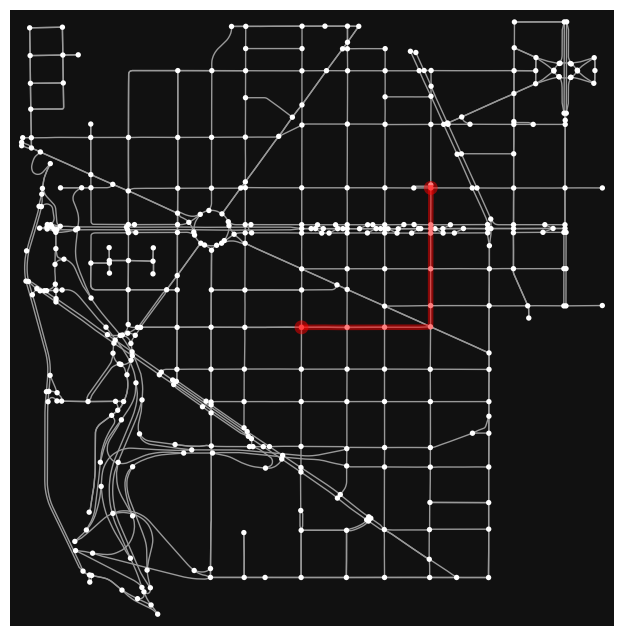

In [6]:
# text version
print(route)

# map route back to original node labels
inv_map = {v: k for k, v in nodedict.items()}
R0 = list(map(inv_map.get, route))

# basic plot
ox.plot_graph_route(G0, R0)

# Folium plot
graph_map = ox.plot_graph_folium(G0, popup_attribute='name', edge_width=2)
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G0, R0, popup_attribute='length')
# save as html file then display map as an iframe
route_graph_map.save('route.html')
route_graph_map

In [7]:
import osmnx as ox
import networkx

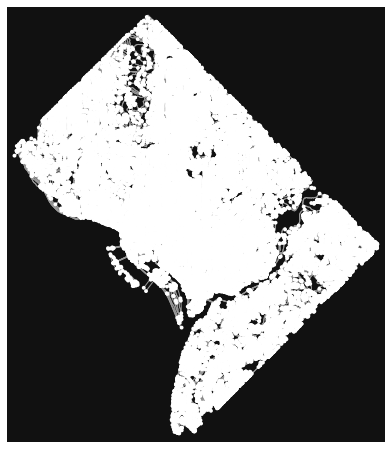

(<Figure size 576x576 with 1 Axes>, <AxesSubplot: >)

In [ ]:
ox.plot_graph(ox.graph_from_place('Washington, DC'))

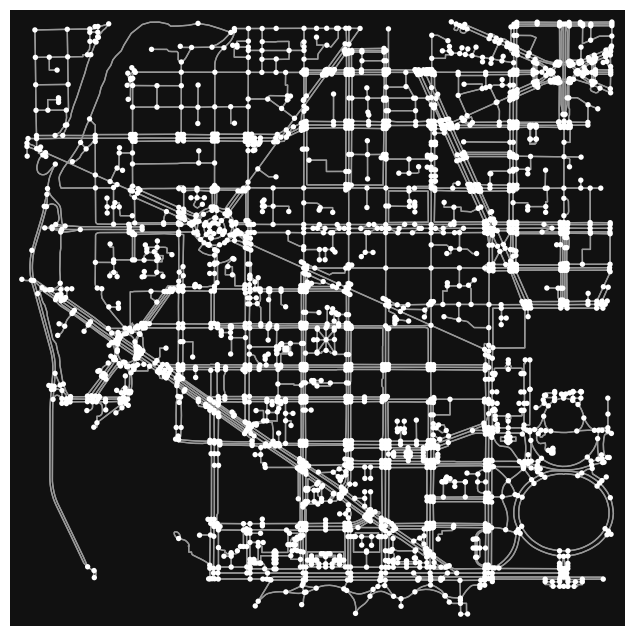

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
G = ox.graph_from_address('805 21st St NW, Washington, DC 20052', network_type='walk')
ox.plot_graph(G)